In [38]:
import numpy as np
import pandas as pd
import nltk
import unidecode

from nltk import tokenize

In [39]:
def pretty_print_tweet(item):
    print(item.Classificacao.ljust(10) + ":\t" + item.Text[0:60] + "...")

In [40]:
df = pd.read_csv('data/Tweets_Mg.csv', encoding='utf-8')
df_orig = df
df.head(1)

,Unnamed: 0,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df.loc[[1,10,30]]

,Unnamed: 0,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,10,Mon Jan 09 15:09:31 +0000 2017,"""Daí a gente visita governador valadares""\n""Qu...",NaN,NaN,error 404 location not found,gambim,marina_gambim,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,30,Fri Jan 06 11:02:14 +0000 2017,#beta #betalab #mg Afiliada da Globo: Apresent...,NaN,NaN,NaN,Guilherme # Beta,guilhermecorde,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8199 entries, 0 to 8198
Data columns (total 26 columns):
Unnamed: 0                   8199 non-null int64
Created At                   8199 non-null object
Text                         8199 non-null object
Geo Coordinates.latitude     104 non-null float64
Geo Coordinates.longitude    104 non-null float64
User Location                5489 non-null object
Username                     8199 non-null object
User Screen Name             8199 non-null object
Retweet Count                8199 non-null int64
Classificacao                8199 non-null object
Observação                   1 non-null object
Unnamed: 10                  0 non-null float64
Unnamed: 11                  0 non-null float64
Unnamed: 12                  0 non-null float64
Unnamed: 13                  0 non-null float64
Unnamed: 14                  0 non-null float64
Unnamed: 15                  0 non-null float64
Unnamed: 16                  0 non-null float64
Unnamed: 17 

## Remover as colunas que não serão utilizadas

In [43]:
df = df[['Text','Classificacao']]
df.head()

,Text,Classificacao
0,���⛪ @ Catedral de Santo Antônio - Governador ...,Neutro
1,"� @ Governador Valadares, Minas Gerais https:/...",Neutro
2,"�� @ Governador Valadares, Minas Gerais https:...",Neutro
3,��� https://t.co/BnDsO34qK0,Neutro
4,��� PSOL vai questionar aumento de vereadores ...,Negativo


In [44]:
for i in range(10):
    pretty_print_tweet(df.loc[i])

Neutro    :	���⛪ @ Catedral de Santo Antônio - Governador Valadares/MG h...
Neutro    :	� @ Governador Valadares, Minas Gerais https://t.co/B3ThIDJC...
Neutro    :	�� @ Governador Valadares, Minas Gerais https://t.co/dPkgzVR...
Neutro    :	��� https://t.co/BnDsO34qK0...
Negativo  :	��� PSOL vai questionar aumento de vereadores e prefeito de ...
Neutro    :	" bom é bandido morto"
Deputado Cabo Júlio é condenado e fic...
Neutro    :	"..E 25% dos mineiros dizem não torcer para time nenhum,mesm...
Neutro    :	"A gigantesca barba do mal" em destaque no caderno Cultura d...
Negativo  :	"BB e governo de Minas travam disputa sobre depósitos judici...
Neutro    :	"com vcs bh fica pequena!" Belo Horizonte (pron. [bɛloɾiˈzõn...


## Contagem do número de tweets por categoria

In [45]:
df.groupby('Classificacao').count()

,Text
Classificacao,
Negativo,2446
Neutro,2453
Positivo,3300


## Separar os elementos baseado na classificação

In [46]:
df_neg = df.query('Classificacao == "Negativo"')
df_pos = df.query('Classificacao == "Positivo"')
df_neu = df.query('Classificacao == "Neutro"')

## Negativos

In [47]:
for i in range(5):
    pretty_print_tweet(df_neg.reset_index().loc[i])

Negativo  :	��� PSOL vai questionar aumento de vereadores e prefeito de ...
Negativo  :	"BB e governo de Minas travam disputa sobre depósitos judici...
Negativo  :	"erro desconhecido" é mato! Aliás, é da secretaria estadual ...
Negativo  :	"Mesmo sem muito dinheiro no caixa o governo de Minas Gerais...
Negativo  :	"uso de aeronave pertencente ao  Estado de MG, em domingo, p...


## Positivos

In [48]:
for i in range(5):
    pretty_print_tweet(df_pos.reset_index().loc[i])

Positivo  :	#DefesaAgropecuária "Governo de Minas Gerais aposta nos Arra...
Positivo  :	#EBC Governo de Minas investiga casos suspeitos de febre ama...
Positivo  :	#Minas vai dobrar oferta de trabalho e estudo nos #presídios...
Positivo  :	#Minas vai dobrar oferta de trabalho e estudo nos #presídios...
Positivo  :	#SUS Minas Gerais recebe recurso máximo disponibilizado pelo...


## Neutros

In [49]:
for i in range(5):
    pretty_print_tweet(df_neu.reset_index().loc[i])

Neutro    :	���⛪ @ Catedral de Santo Antônio - Governador Valadares/MG h...
Neutro    :	� @ Governador Valadares, Minas Gerais https://t.co/B3ThIDJC...
Neutro    :	�� @ Governador Valadares, Minas Gerais https://t.co/dPkgzVR...
Neutro    :	��� https://t.co/BnDsO34qK0...
Neutro    :	" bom é bandido morto"
Deputado Cabo Júlio é condenado e fic...


# Pre-processamento dos tweets

A funcao `remover_acentos` é aplicada a cada tupla do DataFrame na coluna text, usando a função `apply`.

In [50]:
def remover_acentos(texto):
    return unidecode.unidecode(texto)

In [51]:
df.Text = df.Text.apply(remover_acentos)

In [52]:
for i in range(10):
    pretty_print_tweet(df.loc[i])

Neutro    :	[?] @ Catedral de Santo Antonio - Governador Valadares/MG ht...
Neutro    :	 @ Governador Valadares, Minas Gerais https://t.co/B3ThIDJCS...
Neutro    :	 @ Governador Valadares, Minas Gerais https://t.co/dPkgzVR2Q...
Neutro    :	 https://t.co/BnDsO34qK0...
Negativo  :	 PSOL vai questionar aumento de vereadores e prefeito de BH ...
Neutro    :	" bom e bandido morto"
Deputado Cabo Julio e condenado e fic...
Neutro    :	"..E 25% dos mineiros dizem nao torcer para time nenhum,mesm...
Neutro    :	"A gigantesca barba do mal" em destaque no caderno Cultura d...
Negativo  :	"BB e governo de Minas travam disputa sobre depositos judici...
Neutro    :	"com vcs bh fica pequena!" Belo Horizonte (pron. [belori'zon...


- Remoção de endereço de website
- remoção de caracteres que não são letras, numeros, espaços , virgulas ou pontos

In [53]:
regex_to_replace = {r'https?:\/\/.*[\r\n]*':'', '[^a-zA-Z0-9\s,.]+' : ''}

In [54]:
df.Text = df.Text.replace(regex_to_replace, regex = True)

In [55]:
for i in range(10):
    pretty_print_tweet(df.loc[i])

Neutro    :	  Catedral de Santo Antonio  Governador ValadaresMG ...
Neutro    :	  Governador Valadares, Minas Gerais ...
Neutro    :	  Governador Valadares, Minas Gerais ...
Neutro    :	 ...
Negativo  :	 PSOL vai questionar aumento de vereadores e prefeito de BH ...
Neutro    :	 bom e bandido morto
Deputado Cabo Julio e condenado e fica ...
Neutro    :	..E 25 dos mineiros dizem nao torcer para time nenhum,mesmo ...
Neutro    :	A gigantesca barba do mal em destaque no caderno Cultura do ...
Negativo  :	BB e governo de Minas travam disputa sobre depositos judicia...
Neutro    :	com vcs bh fica pequena Belo Horizonte pron. belorizontSi10 ...


## Remoção de Stopwords

In [56]:
def remove_stopwords(sentence, language="portuguese"):
    from nltk.corpus import stopwords
    #Split sentence into words
    words = sentence.split(' ')
    #Get the stopwords
    stopwords = stopwords.words(language)
    words_new = [word for word in words if word not in stopwords]
    #impode words into a sentence and return
    return ' '.join(words_new)

In [57]:
df['Text'] = df['Text'].apply(remove_stopwords)

/home/aluno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [58]:
for i in range(10):
    pretty_print_tweet(df.loc[i])

Neutro    :	  Catedral Santo Antonio  Governador ValadaresMG ...
Neutro    :	  Governador Valadares, Minas Gerais ...
Neutro    :	  Governador Valadares, Minas Gerais ...
Neutro    :	 ...
Negativo  :	 PSOL vai questionar aumento vereadores prefeito BH Justica ...
Neutro    :	 bom bandido morto
Deputado Cabo Julio condenado fica ineleg...
Neutro    :	..E 25 mineiros dizem nao torcer time nenhum,mesmo dentro es...
Neutro    :	A gigantesca barba mal destaque caderno Cultura Estado Minas...
Negativo  :	BB governo Minas travam disputa sobre depositos judiciais ...
Neutro    :	vcs bh fica pequena Belo Horizonte pron. belorizontSi10 capi...


## Aplicação de Stemmings

In [59]:
def stem_sentence(sentence, language = "portuguese"):
    from nltk.stem.snowball import SnowballStemmer
    words = sentence.split(' ')
    #Stem words
    stemmer = SnowballStemmer(language)
    words_stem = [stemmer.stem(word) for word in words]
    #impode words into a sentence and return
    return ' '.join(words_stem)

In [60]:
df['Text'] = df['Text'].apply(stem_sentence)
for i in range(10):
    pretty_print_tweet(df.loc[i])

Neutro    :	  catedral sant antoni  govern valadaresmg ...
Neutro    :	  govern valadares, min ger ...
Neutro    :	  govern valadares, min ger ...
Neutro    :	 ...
Negativo  :	 psol vai question aument vereador prefeit bh justic  polit ...
Neutro    :	 bom band morto
deput cab juli conden fic inelegivel 10 anos...
Neutro    :	..e 25 mineir diz nao torc tim nenhum,mesm dentr estad atlet...
Neutro    :	a gigantesc barb mal destaqu cadern cultur estad minas. ...
Negativo  :	bb govern min trav disput sobr deposit judic ...
Neutro    :	vcs bh fic pequen bel horizont pron. belorizontsi10 capital ...


/home/aluno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Contagem de Termos Antes / Depois do Pré-Processamento
- Usamos uma função que explora a coluna que contém os textos, separa cada sentença em palavras, e retorna o conjunto (sem repetições) de palavras.

In [61]:
from itertools import chain
def get_word_set(sentences):
    words_for_sentence =  [sentence.split(' ') for sentence in sentences]
    flatten_list = list(chain(*words_for_sentence))
    word_set = set (flatten_list)
    return word_set

In [62]:
word_set_orig = get_word_set(df_orig.Text)
print('Número de Termos: ', len(word_set_orig))

Número de Termos:  16271


In [63]:
word_set = get_word_set(df.Text)
print('Número de Termos: ', len(word_set))

Número de Termos:  6639


In [64]:
ratio = 1 - len(word_set)/len(word_set_orig)
print("A redução de número de termos foi de {:.2f}%".format(ratio*100))

A redução de número de termos foi de 59.20%


## Palavras mais Frequentes Positivas e Negativas

In [67]:
dfnew = df.query('Classificacao == "Positivo"').append(df.query('Classificacao == "Negativo"')).reset_index(drop=True)
dfnew.head()

,Text,Classificacao
0,defesaagropecu govern min ger apost arranj pro...,Positivo
1,ebc govern min investig cas suspeit febr amare...,Positivo
2,min vai dobr ofert trabalh estud presidi estado\n,Positivo
3,min vai dobr ofert trabalh estud presidi estado\n,Positivo
4,sus min ger receb recurs maxim disponibiliz go...,Positivo


In [68]:
from collections import Counter
positive_counts = Counter()
negative_counts = Counter()
total_counts = Counter()

In [70]:
for i in range(len(dfnew.Text)):
    if(dfnew.Classificacao[i]=='Positivo'):
        for word in dfnew.Text[i].split(" "):
            positive_counts[word] += 1
            total_counts[word] += 1
    else:
        for word in dfnew.Text[i].split(" "):
            negative_counts[word] += 1
            total_counts[word] += 1

In [72]:
positive_counts.most_common(10)

[('', 4080),
 ('min', 964),
 ('drog', 916),
 ('pres', 778),
 ('rt', 608),
 ('mg', 570),
 ('presidi', 536),
 ('febr', 489),
 ('trafic', 487),
 ('amarel', 474)]

In [73]:
negative_counts.most_common(10)

[('', 2207),
 ('rt', 1729),
 ('govern', 1518),
 ('helicopter', 1234),
 ('mg', 1096),
 ('compr', 977),
 ('calam', 958),
 ('dois', 786),
 ('min', 677),
 ('q', 621)]

In [74]:
total_counts.most_common(10)

[('', 6287),
 ('rt', 2337),
 ('govern', 1789),
 ('mg', 1666),
 ('min', 1641),
 ('helicopter', 1234),
 ('compr', 977),
 ('calam', 958),
 ('drog', 916),
 ('dois', 892)]

## Taxas de Positivos em relação aos Negativos
- Para saber a correspondência de cada palavra com tweets positivos ou negativos podemos calcular uma taxa que:
    - Positivos: tenham valores acima de 1 (numerador maior que denomidador)
    - Negativos: tenham valores entre 0 e 1 (denominador maior que numerador)
    - Neutro: próximo de 1 (numerador e denominador parecidos)

In [76]:
pos_neg_ratios = Counter()
#Calculate the ratios of positive and negative uses of the most common words
#Consider words to be "common" if they've ben used at least 100 times
for term, cnt in list(total_counts.most_common()):
    if(cnt > 100):
        pos_neg_ratio = positive_counts[term]/float(negative_counts[term] + 1)
        pos_neg_ratios[term] = pos_neg_ratio

In [77]:
pos_neg_ratios.most_common(10)

[('drog', 916.0),
 ('trafic', 487.0),
 ('pmmg190', 351.0),
 ('apreend', 320.0),
 ('priv', 269.0),
 ('for', 253.0),
 ('anos,', 252.0),
 ('febr', 244.5),
 ('amarel', 237.0),
 ('roub', 222.5)]

In [78]:
print("Pos-to-neg ratio for 'drog' = {:.3f}".format(pos_neg_ratios["drog"]))

Pos-to-neg ratio for 'drog' = 916.000


### Normalização de taxa para valores positivos e negativos e linearização

In [79]:
# convert ratios to Logs
for word, ratio in pos_neg_ratios.most_common():
    if (ratio > 1):
        pos_neg_ratios[word] = np.log(ratio)
    elif(ratio < 1):
        pos_neg_ratios[word] = -np.log(1/(ratio+0.01))
    else:
        pos_neg_ratios[word] = 0

In [84]:
print("Pos-to-neg ratio for 'drog' = {:.3f}".format(pos_neg_ratios["drog"]))
print("Pos-to-neg ratio for 'trafic' = {:.3f}".format(pos_neg_ratios["trafic"]))

Pos-to-neg ratio for 'drog' = 6.820
Pos-to-neg ratio for 'trafic' = 6.188


In [86]:
pos_neg_ratios.most_common()[-15:]

[('compr', -4.605170185988092),
 ('calam', -4.605170185988092),
 ('financeira,', -4.605170185988092),
 ('financeir', -4.605170185988092),
 ('pau', -4.605170185988092),
 ('canalhic', -4.605170185988092),
 ('anapaulavol', -4.605170185988092),
 ('viv', -4.605170185988092),
 ('estado.\n\n', -4.605170185988092),
 ('bb', -4.605170185988092),
 ('judicial', -4.605170185988092),
 ('21,8', -4.605170185988092),
 ('calamidade,', -4.605170185988092),
 ('uolnotic', -4.605170185988092),
 ('helicopteros.', -4.605170185988092)]

# Visualização do Score de dos termos

In [88]:
df_pos_neg_ratios = pd.DataFrame.from_dict(pos_neg_ratios, orient='index').reset_index()
df_pos_neg_ratios.columns=['Term','Score']
df_pos_neg_ratios.head()

,Term,Score
0,,0.614010
1,rt,-1.017645
2,govern,-1.669152
3,mg,-0.635635
4,min,0.351944


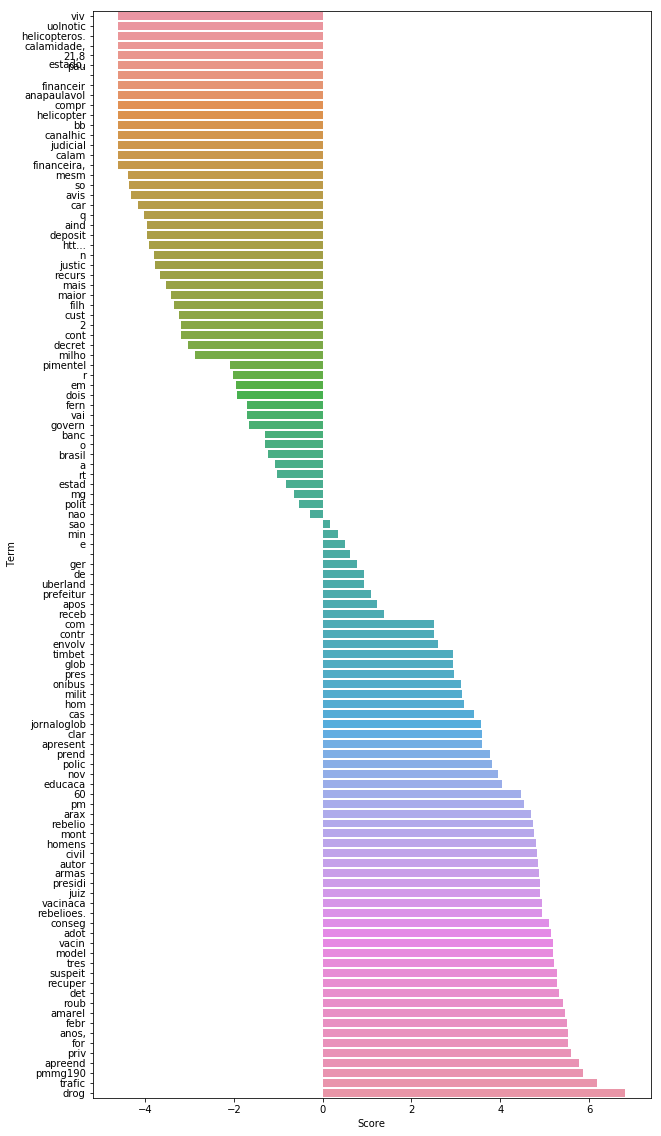

In [90]:
import seaborn as sns
from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize=(10,20))
sns.barplot(ax = ax, y = "Term", x = "Score", data = df_pos_neg_ratios.sort_values(["Score"]))

In [92]:
def get_scores (sentence, pos_neg_ratios):
    keys = pos_neg_ratios.keys()
    words = [word for word in sentence.split(' ') if word in keys]
    word_scores = [ pos_neg_ratios[word] for word in words]
    return word_scores

In [93]:
for i in range(5):
    print('Text:{}'.format(dfnew.Text[i]))
    scores = get_scores(dfnew.Text[i], pos_neg_ratios)
    print('Scores:{}\n'.format(np.around(scores,3)))

Text:defesaagropecu govern min ger apost arranj produt loc ritd 
Scores:[-1.669  0.352  0.772  0.614]

Text:ebc govern min investig cas suspeit febr amarel mal estad 
Scores:[-1.669  0.352  3.418  5.283  5.499  5.468 -0.821  0.614]

Text:min vai dobr ofert trabalh estud presidi estado

Scores:[ 0.352 -1.693  4.898]

Text:min vai dobr ofert trabalh estud presidi estado

Scores:[ 0.352 -1.693  4.898]

Text:sus min ger receb recurs maxim disponibiliz govern federal aco vigilanciasanitaria... 
Scores:[ 0.352  0.772  1.379 -3.664 -1.669  0.614]



In [97]:
def predict(sentence):
    scores = get_scores(sentence, pos_neg_ratios)
    score = sum(scores)
    if(score > 0):
        return 'Positivo'
    else:
        return 'Negativo'

In [98]:
for i in range(10):
    print('Predicted:', predict(dfnew.Text[i]),'; Text:',dfnew.Text[i] [:50])

Predicted: Positivo ; Text: defesaagropecu govern min ger apost arranj produt 
Predicted: Positivo ; Text: ebc govern min investig cas suspeit febr amarel ma
Predicted: Positivo ; Text: min vai dobr ofert trabalh estud presidi estado

Predicted: Positivo ; Text: min vai dobr ofert trabalh estud presidi estado

Predicted: Negativo ; Text: sus min ger receb recurs maxim disponibiliz govern
Predicted: Negativo ; Text: diegocabral75 exam ai mg, ta td bem pimentel cad d
Predicted: Positivo ; Text: israelmass ferrisss jornaloglob men 1 cois p orgul
Predicted: Negativo ; Text: madeleinelacsk em mg sp,o estad razoavel control s
Predicted: Negativo ; Text: madonegatt mg melhor estad
Predicted: Negativo ; Text: mrsincer klyfor mblivr mblivrebh min govern 2003 2


# Classificando todas as sentenças na base de dados
## Forma 1

In [100]:
dfnew['Predicted'] = [predict(sentence) for sentence in dfnew.Text]

In [101]:
dfnew['Predicted'] = dfnew.Text.apply(predict)

In [102]:
dfnew.head(10)

,Text,Classificacao,Predicted
0,defesaagropecu govern min ger apost arranj pro...,Positivo,Positivo
1,ebc govern min investig cas suspeit febr amare...,Positivo,Positivo
2,min vai dobr ofert trabalh estud presidi estado\n,Positivo,Positivo
3,min vai dobr ofert trabalh estud presidi estado\n,Positivo,Positivo
4,sus min ger receb recurs maxim disponibiliz go...,Positivo,Negativo
5,"diegocabral75 exam ai mg, ta td bem pimentel c...",Positivo,Negativo
6,israelmass ferrisss jornaloglob men 1 cois p o...,Positivo,Positivo
7,"madeleinelacsk em mg sp,o estad razoavel contr...",Positivo,Negativo
8,madonegatt mg melhor estad,Positivo,Negativo
9,mrsincer klyfor mblivr mblivrebh min govern 20...,Positivo,Negativo


# Avaliação dos resultados

In [105]:
from pandas_ml import ConfusionMatrix
cm = ConfusionMatrix(y_true=dfnew.Classificacao.map({'Positivo': 1, 'Negativo': 0}), y_pred=dfnew.Predicted.map({'Positivo': 1, 'Negativo': 0}))
cm

Predicted  False  True  __all__
Actual                         
False       2358    88     2446
True         260  3040     3300
__all__     2618  3128     5746